
  # <center>**Analisis Dataset Statistika & Probabilitas**</center>

<h3>
Mata Kuliah: Statistika & Probabilitas<br>
Dosen : Dr. Rizka Wakhidatus Sholikhah, S.Kom.<br>
Dataset : Average Time Spent by a User On Social Media
</h3>
<center>
<p><b>Disusun oleh</b></p>
<p>
    Ahmad Nayottama Juliansyah — 045 <br>
    Anargya Shafa Setiyadi Putra — 081 <br>
    Az Zahra Fiddien Al Farabi — 021 <br>
    Nazwa Aulia Dwi Purnomo — 018 <br>
    <br>

</p>
</center>
<hr>

















# **Daftar isi**

1. **Time Spent on Social Media** <br>
  1.1 Latar belakang <br>
  1.2 Tujuan <br>
2. **Impor Library** <br>
3. **Inisialisasi Dataset** <br>
4. **Data Preprocessing** <br>
  4.1 Pembersihan Data Kategorikal <br>
  4.2 Validasi Format Data Numerik <br>
  4.3 Pengecekan Jumlah Data Duplikat <br>
5. **Exploratory Data Analysis (EDA)**<br>
  5.1 Statistical descriptive analysis<br>
  5.2 Correlation analysis<br>
  5.3 Visualisation<br>
  5.4 Outlier detection<br>
  5.5 Missing value detection<br>
6. **Identifikasi Distribusi**
7. **Perhitungan Probabilitas**
8. **Distribusi Sampling**
9. **Merumuskan Pengujian Hipotesis**<br>
  9.1 Mengetahui apakah rata-rata time spent berbeda antar interest.<br>
  9.2 Mengetahui apakah terdapat hubungan antara Age dan Time Spent<br>
  9.3 Mengetahui apakah kelompok usia menggunakan platform yang berbeda<br>
10. **Kesimpulan**

# **1. TIME SPENT ON SOCIAL MEDIA**

Meningkatnya penggunaan media sosial berdampak pada bertambahnya waktu yang dihabiskan pengguna di berbagai platform. Lama waktu penggunaan (*time spent*) tidak hanya ditentukan oleh kebiasaan masing-masing individu, tetapi juga dipengaruhi oleh minat (*interest*) serta *platform* media sosial yang digunakan. Perbedaan minat dan platform tersebut menimbulkan variasi durasi penggunaan yang cukup signifikan.

**1.1 Latar Belakang Pemilihan Fokus Kajian**

Pemilihan tema *Time Spent on Social Media* didasarkan pada semakin pentingnya media sosial dalam aktivitas sehari-hari. Durasi penggunaan menjadi aspek yang relevan untuk dianalisis karena dapat menggambarkan kebiasaan pengguna serta faktor-faktor yang memengaruhi interaksi mereka di berbagai platform. Variabel seperti platform dan interest memungkinkan eksplorasi pola perilaku digital yang lebih spesifik. Selain bernilai akademis, topik ini juga memiliki manfaat praktis dalam pemasaran digital, analisis pengguna, dan pengembangan layanan berbasis teknologi. Dengan data yang terstruktur dan mudah diolah, tema ini tepat dijadikan fokus EDA dan analisis statistik dalam Final Project.

**1.2 Tujuan Analisis Tema**

*Time Spent on Social Media* bertujuan untuk memahami pola durasi penggunaan media sosial, termasuk mengidentifikasi platform yang berpotensi menyebabkan penggunaan berlebihan serta membandingkan perbedaan waktu penggunaan antar platform.
<br>
<hr>

# **2. IMPOR LIBRARY**

In [ ]:
# Upload File ke Google Colab

from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
#Handling File ZIP di Google Colab

import zipfile
with zipfile.ZipFile("archive.zip", "r") as z:
    z.extractall("data")
import os
os.listdir("data")


['dummy_data.csv']

In [ ]:
# Setup Environment: Pandas, Matplotlib, Seaborn, SciPy, dan NumPy

import pandas as pd #mengolah tabel
import matplotlib.pyplot as plt #membuat grafik
import seaborn as sns #penampilan grafik
import scipy.stats as stats #uji statistik
import numpy as np #operasi numerik
sns.set_theme() #tema visual


In [ ]:
df = pd.read_csv("data/dummy_data.csv")

# **3. INISIALISASI DATASET**

In [ ]:
#Preview Data keseluruhan dari Dataset

df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [ ]:
#Preview Kolom Spesifik dari Dataset

df[['age', 'time_spent', 'platform', 'interests']]

,age,time_spent,platform,interests
0,56,3,Instagram,Sports
1,46,2,Facebook,Travel
2,32,8,Instagram,Sports
3,60,5,Instagram,Travel
4,25,1,Instagram,Lifestlye
...,...,...,...,...
995,22,8,Instagram,Lifestlye
996,40,6,YouTube,Travel
997,27,5,YouTube,Travel
998,61,4,YouTube,Sports


<hr>

# **4. DATA PREPROCESSING**
Tujuan: <br>
Melakukan proses persiapan dan pembersihan data awal untuk memastikan bahwa data yang akan digunakan dalam analisis sudah memiliki kualitas yang baik dan konsisten. Pada tahap ini, variabel age dan time_spent dipastikan bertipe numerik agar bisa dianalisis secara kuantitatif, sementara variabel platform dan interests dipastikan sebagai data kategorikal untuk analisis kualitatif. Dengan demikian, data menjadi valid dan siap untuk proses analisis selanjutnya.

In [ ]:
# Menampilkan informasi umum data secara keseluruhan

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB
None


In [ ]:
# Menampilkan informasi umum data spesifik/pilihan

df[['age','time_spent','platform','interests']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         1000 non-null   int64 
 1   time_spent  1000 non-null   int64 
 2   platform    1000 non-null   object
 3   interests   1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


**4.1 Pembersihan Data Kategorikal** <br>
Tujuan: <br>
Melakukan normalisasi data pada kolom platform dan interests dengan menghapus spasi di awal/akhir dan mengubah semua huruf menjadi kecil (lowercase). Hal ini dilakukan agar data kategorikal menjadi konsisten, sehingga kategori yang sebenarnya sama tidak terbagi menjadi beberapa variasi akibat penulisan yang berbeda, seperti huruf kapital atau spasi yang tidak disengaja.

In [ ]:
# Ubah semua menjadi lowercase dan hilangkan spasi

df['platform'] = df['platform'].str.strip().str.lower()
df['interests'] = df['interests'].str.strip().str.lower()
print(df['platform'].unique())
print(df['interests'].unique())


['instagram' 'facebook' 'youtube']
['sports' 'travel' 'lifestlye']


> Setelah proses normalisasi, fungsi unique() menampilkan daftar kategori unik yang sudah bersih dan terstandarisasi. Misalnya, nilai-nilai seperti " Instagram", "instagram", dan "Facebook " yang sebelumnya terlihat berbeda, sekarang sudah terseragam menjadi "instagram" dan "facebook" tanpa spasi dan dengan huruf kecil semua. Ini menunjukkan data sudah siap dipakai untuk analisis lanjutan tanpa risiko duplikasi kategori akibat format penulisan yang tidak konsisten.

**4.2 Validasi Format Data Numerik** <br>
Tujuan : <br>
Memeriksa dan memastikan bahwa semua nilai dalam kolom age dan time_spent benar-benar berformat angka (numerik). Hal ini penting untuk mengidentifikasi adanya nilai yang tidak valid atau non-numerik yang dapat mengganggu proses analisis statistik dan visualisasi data.

In [ ]:
#Validasi Format Data Angka pada Kolom age dan time_spent

df['age'].apply(lambda x: str(x).isnumeric()).value_counts()
df['time_spent'].apply(lambda x: str(x).isnumeric()).value_counts()


,count
time_spent,
True,1000


> Menghasilkan jumlah nilai yang valid sebagai angka (True) dan yang tidak valid atau non-numerik (False) untuk masing-masing kolom. Semua nilai dalam kolom age dan time_spent berformat numerik dengan benar tanpa ada nilai non-numerik yang terdeteksi. Ini menunjukkan data di kedua kolom tersebut sudah bersih dan siap digunakan untuk analisis statistik maupun visualisasi tanpa perlu pembersihan tambahan terkait tipe data.
Dengan mengetahui jumlah nilai non-numerik, kita dapat mengambil langkah tepat seperti membersihkan, menghapus, atau mengimputasi data yang bermasalah agar hasil analisis lebih akurat.



**4.3 Pengecekan Jumlah Data Duplikat** <br>
Tujuan : <br>
Mengidentifikasi berapa banyak baris dalam dataset yang merupakan duplikat, yaitu baris yang datanya sama persis dengan baris lain sebelumnya. Ini penting untuk menjaga kualitas data dan menghindari bias atau distorsi hasil analisis akibat pengulangan data yang tidak diinginkan.

In [ ]:
# Pengecekan Jumlah Data Duplikat

df.duplicated().sum()


np.int64(0)

> Kode df.duplicated().sum() mengembalikan jumlah total baris duplikat dalam DataFrame. Dataset ini tidak mengandung baris duplikat sama sekali. Semua data dalam DataFrame bersifat unik tanpa ada pengulangan baris yang persis sama. Ini menunjukkan bahwa data sudah bersih dari duplikasi, sehingga analisis yang dilakukan tidak akan terpengaruh oleh pengulangan data yang dapat menyebabkan bias atau distorsi hasil.

In [ ]:
#Persiapan Data Bersih (Clean Data) untuk Analisis

clean_df = df[['age','time_spent','platform','interests']]
clean_df


,age,time_spent,platform,interests
0,56,3,instagram,sports
1,46,2,facebook,travel
2,32,8,instagram,sports
3,60,5,instagram,travel
4,25,1,instagram,lifestlye
...,...,...,...,...
995,22,8,instagram,lifestlye
996,40,6,youtube,travel
997,27,5,youtube,travel
998,61,4,youtube,sports


> DataFrame baru clean_df yang hanya berisi keempat kolom tersebut. <br>
Dengan menampilkan clean_df, kita dapat memastikan bahwa data yang dipilih sudah benar dan siap untuk langkah-langkah analisis lebih lanjut seperti visualisasi, transformasi, atau modeling. Ini juga membantu menjaga data tetap rapi dan terorganisir dengan hanya fokus pada variabel yang dibutuhkan.

# **5. Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) adalah langkah awal yang sangat penting dalam proses analisis data. Tujuan utama EDA adalah untuk memahami struktur, pola, dan karakteristik utama dari data yang dimiliki sebelum melakukan pemodelan atau analisis lanjutan. Dengan melakukan EDA, kita dapat mengidentifikasi masalah potensial seperti data yang hilang, outlier, atau variabel yang tidak relevan, serta menentukan hubungan antar variabel. Proses ini menggunakan teknik statistik deskriptif, visualisasi, dan metode deteksi data bermasalah.

**5.1 STATISTICAL DESCRIPTIVE ANALYSIS**


In [ ]:
df4 = df[['age', 'time_spent', 'platform', 'interests']]

categorical_cols = df4.select_dtypes(include=["object"]).columns.tolist()
numeric_cols     = df4.select_dtypes(include=["int64", "float64"]).columns.tolist()
df4 = df[['age', 'time_spent', 'platform', 'interests']]

print("\nDATA TYPE DETECTION:")

categorical_cols = df4.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = df4.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


print("\nNUMERIC DESCRIPTION:")
display(df4[numeric_cols].describe().T)

print("\nCATEGORICAL DESCRIPTION:")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df4[col].value_counts().to_frame("count"))


DATA TYPE DETECTION:
Categorical columns: ['platform', 'interests']
Numeric columns: ['age', 'time_spent']

NUMERIC DESCRIPTION:


,count,mean,std,min,25%,50%,75%,max
age,1000.0,40.986,13.497852,18.0,29.0,42.0,52.0,64.0
time_spent,1000.0,5.029,2.537834,1.0,3.0,5.0,7.0,9.0



CATEGORICAL DESCRIPTION:

Value counts for platform:


,count
platform,
instagram,363
youtube,330
facebook,307



Value counts for interests:


,count
interests,
lifestlye,341
sports,331
travel,328


**1. Data Type Detection**

Dataset terdiri dari 1000 observasi dengan 4 variabel utama. Berdasarkan deteksi tipe data, terdapat:
* variabel numerik: age dan time_spent
* variabel kategorik: platform dan interests

**Variabel numerik** merupakan variabel berisi angka yang dapat diukur dan dianalisis secara kuantitatif. Pada dataset ini, *'age'* dan *'time_spent'* termasuk variabel numerik karena keduanya memuat nilai usia serta durasi penggunaan dalam bentuk angka. Sedangkan, **Variabel kategorik** adalah variabel yang berisi kategori yang mewakili kelompok tertentu dan umumnya dianalisis melalui distribusi frekuensi. Pada dataset ini, *'platform'* dan *'interests'* termasuk variabel kategorik.

Pengelompokan ini penting karena menentukan metode analisis yang tepat, seperti penggunaan descriptive statistics untuk variabel numerik dan frequency distribution untuk variabel kategorik.

**2. Descriptive Statistics (Numerical Variables)**

1. **Variabel age:** Variabel age menunjukkan usia pengguna dengan rata-rata 40.99 tahun dan standar deviasi 13.50 tahun, mencerminkan variasi usia yang cukup luas. Usia pengguna berada pada rentang 18 hingga 64 tahun, dengan median 42 tahun. Berdasarkan kuartil, sebagian besar pengguna berada pada rentang usia 29-52 tahun, sehingga dapat disimpulkan bahwa platform terutama digunakan oleh kelompok usia dewasa produktif.

2. **Variabel time_spent:** Variabel time_spent menunjukkan durasi penggunaan platform per hari. Rata-rata penggunaan adalah 5.03 jam dengan standar deviasi 2.54 jam, menandakan adanya variasi intensitas antar pengguna. Durasi penggunaan berkisar antara 1 hingga 9 jam, dengan median 5 jam. Berdasarkan kuartil, sebagian besar pengguna menghabiskan 3-7 jam per hari, menunjukkan pola penggunaan yang umumnya moderat namun tetap mencakup beberapa pengguna dengan durasi penggunaan tinggi.

**3. Frequency Distribution (Categorical Variables)**
1. **Platform:** Variabel platform menggambarkan jenis media sosial yang digunakan oleh responden. Berdasarkan distribusinya, Instagram menjadi platform yang paling banyak digunakan dengan total 363 pengguna, diikuti oleh YouTube sebanyak 330 pengguna dan Facebook sebanyak 307 pengguna. Ketiga platform memiliki jumlah pengguna yang relatif berdekatan sehingga tidak ada kategori yang benar-benar dominan. Hal ini menunjukkan bahwa preferensi pengguna terhadap platform media sosial cukup merata, dan dataset memiliki keseimbangan yang baik untuk dilakukan analisis perbandingan antar platform.

2. **Interest:** Variabel interests menggambarkan kategori minat utama pengguna dalam dataset. Distribusi frekuensinya menunjukkan bahwa minat Lifestyle merupakan kategori dengan jumlah pengguna terbanyak yaitu 341 orang, disusul kategori Sports dengan 331 pengguna. Kedua kategori ini memiliki jumlah yang hampir seimbang, yang menunjukkan bahwa ketertarikan pengguna sebagian besar berfokus pada konten gaya hidup dan olahraga.

**5.2 CORRELATION ANALYSIS**


CORRELATION ANALYSIS:


,age,time_spent
age,1.000000,-0.033827
time_spent,-0.033827,1.000000


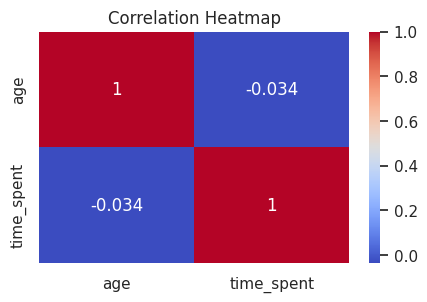

In [ ]:
df4 = df[['age', 'time_spent', 'platform', 'interests']]

categorical_cols = df4.select_dtypes(include=["object"]).columns.tolist()
numeric_cols     = df4.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCORRELATION ANALYSIS:")

if len(numeric_cols) > 1:
    corr = df4[numeric_cols].corr()
    display(corr)

    plt.figure(figsize=(5,3))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Correlation skipped (only one numeric column).")

**Correlation Analysis** merupakan metode statistik yang digunakan untuk menilai serta memahami sejauh mana dua variabel numerik saling berhubungan. Tujuan dari **Correlation Analysis** untuk membantu memahami pola, membuat prediksi, dan menentukan variabel mana yang relevan untuk model analitik. Berdasarkan dataset pada kolom age dan time_spent terlihat bahwa nilai korelasi antara kedua variabel tersebut adalah -0.034. Nilai -0.034 berada sangat dekat dengan 0 yang artinya tidak terdapat hubungan linear yang signifikan antara *"age"* dan *"time_spent"*. Hal yang sama juga tergambar pada heatmap korelasi, di mana warna pada sel yang mewakili hubungan kedua variabel tampak netral (mendekati warna tengah), menandakan lemahnya hubungan tersebut. Dengan demikian, dapat disimpulkan bahwa perbedaan usia tidak berpengaruh secara berarti terhadap durasi waktu penggunaan, sehingga kedua variabel ini berjalan relatif independen antara satu sama lain dalam konteks dataset ini.

**5.3 VISUALISATION**

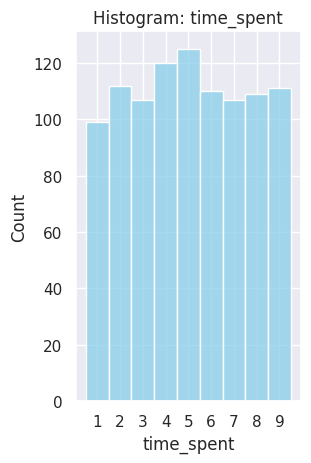

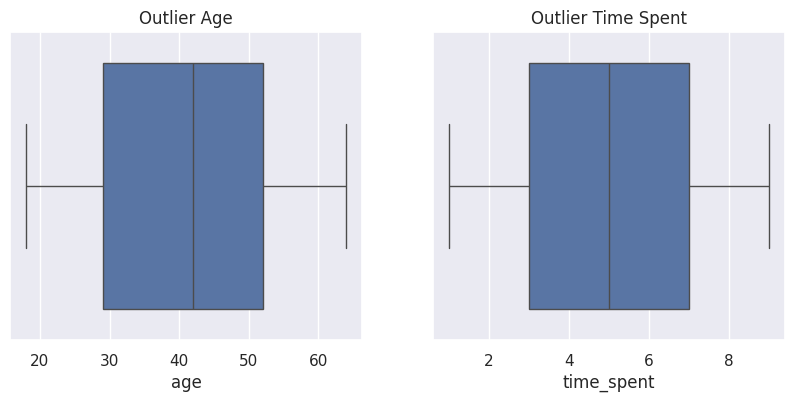

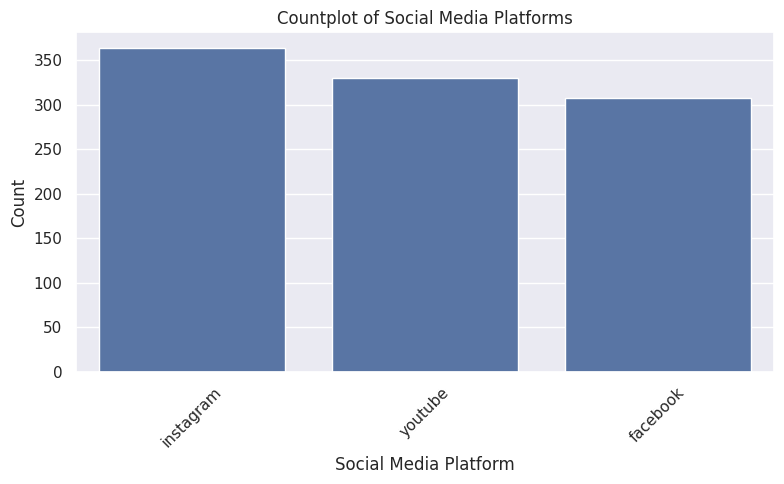

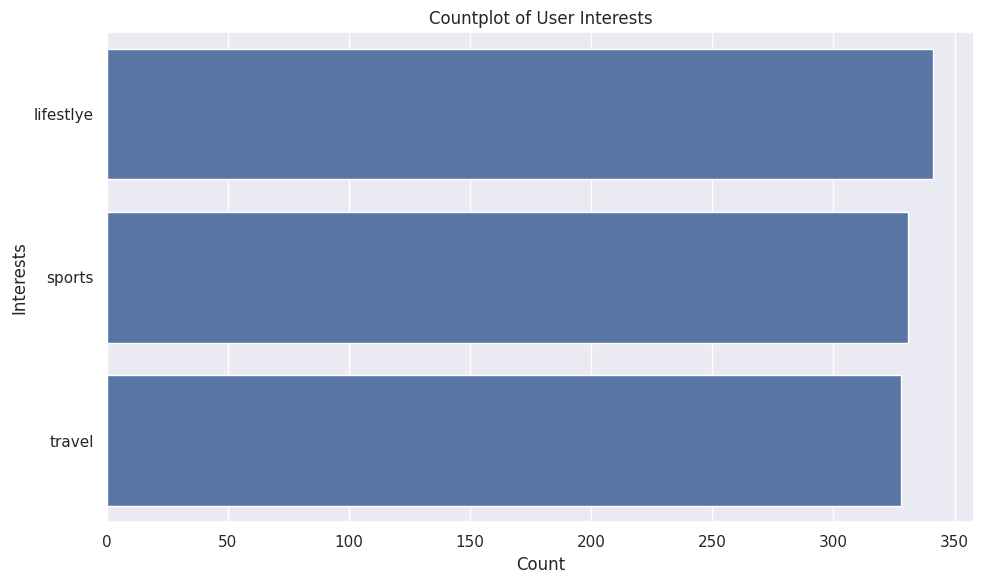

In [ ]:
#Histogram
data = df[['time_spent']]
col = "time_spent"
plt.subplot(1, 2, 1)
sns.histplot(
    data[col],
    bins=[i + 0.5 for i in range(0, 10)],
    edgecolor='white',
    color='skyblue'
)
plt.xticks(range(1, 10))
plt.title(f"Histogram: {col}")
plt.title(f"Histogram: {col}")
plt.title(f"Histogram: {col}")

#Visualisasi Boxplot
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(ax=axes[0], data=df, x='age')
axes[0].set_title('Outlier Age')
sns.boxplot(ax=axes[1], data=df, x='time_spent')
axes[1].set_title('Outlier Time Spent')
plt.show()

#Countplot Platform
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.title('Countplot of Social Media Platforms')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Countplot Interests
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='interests', order=df['interests'].value_counts().index)
plt.title('Countplot of User Interests')
plt.xlabel('Count')
plt.ylabel('Interests')
plt.tight_layout()
plt.show()

**5.4 OUTLIER DETECTION**

In [ ]:
# Outlier Time
Q1 = df['time_spent'].quantile(0.25)
Q3 = df['time_spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliers = df[(df['time_spent'] < lower_bound) | (df['time_spent'] > upper_bound)]

print("Outlier Time Spent")
print("------------------")
print("Lower Bound :", lower_bound)
print("Upper Bound :", upper_bound)
print("Jumlah Outliers :", len(df_outliers))
print("\n")


# Outlier Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
df_outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]

print("Outlier Age")
print("-----------")
print("Lower Bound :", lower_bound_age)
print("Upper Bound :", upper_bound_age)
print("Jumlah Outliers :", len(df_outliers_age))



Outlier Time Spent
------------------
Lower Bound : -3.0
Upper Bound : 13.0
Jumlah Outliers : 0


Outlier Age
-----------
Lower Bound : -5.5
Upper Bound : 86.5
Jumlah Outliers : 0


**Outlier detection** adalah proses penting dalam Exploratory Data Analysis yang **bertujuan** mengidentifikasi nilai-nilai data ekstrem yang berbeda secara signifikan dari mayoritas data, karena outlier dapat mempengaruhi hasil analisis dan model yang dibangun. Pada variabel time_spent, batas bawah dan atas yang dihitung masing-masing adalah -3.0 dan 13.0, sedangkan pada variabel age batasnya adalah -5.5 dan 86.5. **Hasil deteksi** menunjukkan tidak ditemukan outlier pada kedua variabel tersebut, yang berarti semua data berada dalam rentang nilai yang wajar dan tidak ada data ekstrem yang dapat mengganggu analisis. Kondisi ini mengindikasikan bahwa distribusi data untuk durasi waktu penggunaan dan usia cukup homogen dan bersih, sehingga analisis statistik maupun pemodelan selanjutnya dapat dilakukan dengan keyakinan tanpa perlu melakukan penanganan khusus terhadap nilai-nilai ekstrim. Dengan demikian, validitas dan reliabilitas data pada kedua variabel ini terjaga, mendukung kualitas hasil analisis yang akan dilakukan.

**5.5 MISSING VALUE DETECTION**

In [ ]:
df4 = df[['age', 'time_spent', 'platform', 'interests']]

print("\nMISSING VALUE DETECTION")
missing_table = pd.DataFrame({
    "missing_count": df4.isnull().sum(),
    "missing_percent (%)": (df4.isnull().mean() * 100).round(2)
})
display(missing_table)



MISSING VALUE DETECTION


,missing_count,missing_percent (%)
age,0,0.0
time_spent,0,0.0
platform,0,0.0
interests,0,0.0


**Missing value detection** adalah proses penting dalam Exploratory Data Analysis yang **bertujuan** mengidentifikasi dan mengukur keberadaan data kosong atau hilang dalam dataset. Dari **hasil analisis**, seluruh variabel yaitu age, time_spent, platform, dan interests tidak memiliki missing value sama sekali, baik dalam jumlah maupun persentase, yang menunjukkan 0 data hilang di setiap kolom. Kondisi ini menandakan bahwa dataset yang digunakan lengkap dan tidak terdapat kekurangan data yang dapat mempengaruhi validitas analisis lebih lanjut. Dengan demikian, proses pengolahan data seperti imputasi atau penghapusan data tidak diperlukan, sehingga analisis dan pemodelan selanjutnya dapat dilakukan secara optimal tanpa risiko bias akibat data yang hilang.

# **6. IDENTIFY DISTRIBUTION**

Mengidentifikasi bentuk distribusi data guna menentukan apakah data mengikuti distribusi normal atau tidak. Analisis distribusi dilakukan melalui beberapa pendekatan, yaitu visualisasi histogram untuk melihat pola frekuensi dan penyebaran nilai, Q–Q Plot untuk membandingkan kuantil data dengan kuantil distribusi normal, serta pengukuran statistik seperti skewness dan kurtosis untuk mengevaluasi tingkat simetri dan bentuk puncak distribusi.

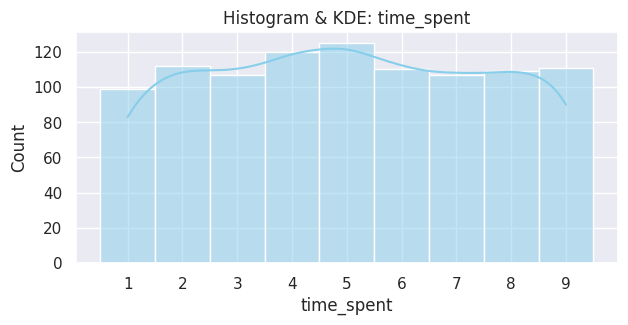

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))

# Histogram + KDE
sns.histplot(
    data[col],
    bins=[i + 0.5 for i in range(0, 10)],
    kde=True,
    stat="count",
    edgecolor='white',
    color='skyblue'
)

plt.xticks(range(1, 10))
plt.title(f"Histogram & KDE: {col}")
plt.xlabel(col)
plt.ylabel("Count")

plt.show()


**Histogram Distribusi dan Kernel Density Estimation (KDE) untuk Variabel time_spent**

Plot KDE memberikan gambaran yang lebih halus mengenai bentuk distribusi variabel time_spent. Berbeda dengan histogram yang menampilkan frekuensi dalam bentuk batang, KDE menghasilkan kurva estimasi kepadatan probabilitas yang menggambarkan bagaimana data tersebar pada setiap nilai dalam rentang pengukuran.

Dari hasil visualisasi KDE, terlihat bahwa kurva kepadatan memiliki bentuk yang relatif datar dan tidak menunjukkan puncak yang sangat tajam pada nilai tertentu. Ini konsisten dengan distribusi yang bersifat mendekati seragam (uniform), di mana tidak ada satu rentang nilai yang mendominasi secara signifikan. Kurva yang tidak condong ke kiri atau kanan juga menguatkan kesimpulan bahwa distribusi data time_spent simetris dan tidak menunjukkan pola skewness baik ke arah nilai rendah maupun tinggi.

Puncak kurva berada di sekitar nilai 4 hingga 5, menunjukkan bahwa pengguna paling banyak berada pada rentang waktu tersebut, namun jaraknya sangat tipis dibanding kategori lain. Hal ini berarti bahwa meskipun nilai 4–5 sedikit lebih umum, perbedaannya tidak cukup besar untuk menandakan konsentrasi atau clustering yang kuat pada nilai tersebut. Dengan kata lain, KDE mengonfirmasi bahwa penggunaan waktu tersebar merata di seluruh rentang nilai dan tidak terdapat anomali atau preferensi yang menonjol.

Selain itu, tidak terlihat adanya ekor panjang (long tail) baik di sisi kiri maupun kanan, sehingga dapat disimpulkan bahwa distribusi tidak heavy-tailed. Kondisi ini mengindikasikan bahwa pengguna dengan waktu penggunaan sangat rendah atau sangat tinggi relatif jarang dan tetap berada dalam pola distribusi normal dataset.

Secara keseluruhan, KDE menguatkan interpretasi histogram bahwa variabel time_spent memiliki distribusi yang stabil, simetris, dan tanpa outlier signifikan. Oleh karena itu, variabel ini dapat dianalisis lebih lanjut dengan metode statistik yang tidak memerlukan asumsi skewness atau distribusi miring yang ekstrem, serta cocok untuk digunakan dalam analisis deskriptif, korelasi, maupun segmentasi pengguna.


Q-Q PLOT:



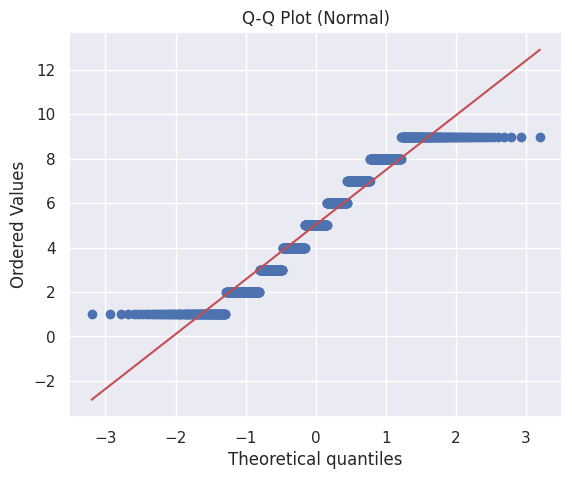

In [ ]:
# ---------------- Q-Q PLOT ----------------
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
print("\nQ-Q PLOT:\n")
stats.probplot(data[col], dist="norm", plot=plt)
plt.title("Q-Q Plot (Normal)")

plt.show()

**Q–Q Plot** digunakan untuk membandingkan distribusi empiris data dengan distribusi teoretis yang diasumsikan normal. Pada plot ini, setiap titik mewakili pasangan antara sample quantile dan theoretical quantile. Jika data mengikuti distribusi normal, titik-titik tersebut akan cenderung berada di sepanjang garis diagonal. Berdasarkan Q–Q Plot yang dihasilkan, pola titik menunjukkan beberapa penyimpangan terhadap garis diagonal. Pada bagian kuantil rendah, titik cenderung berada di bawah garis teoretis, sedangkan pada kuantil tinggi tampak menyimpang ke arah atas. Selain itu, pola titik terlihat bertingkat (stepwise), yang mengindikasikan bahwa sebaran data tidak mengikuti pola kuantil yang mulus sebagaimana distribusi normal.  <br>
Penyimpangan visual ini memberikan indikasi awal bahwa distribusi data mungkin tidak sepenuhnya mengikuti distribusi normal. Namun, Q–Q Plot bersifat eksploratif sehingga kesimpulan final mengenai normalitas akan lebih kuat apabila didukung oleh uji statistik formal pada bagian berikutnya.

In [ ]:
# ---------------- NORMALITY TEST ----------------
shapiro_p = stats.shapiro(data[col]).pvalue
ks_p = stats.kstest((data[col] - data[col].mean())/data[col].std(), 'norm').pvalue

print("\nUji Normalitas (Normality Test)")
print(f"Shapiro–Wilk p-value: {shapiro_p:.4f}")
print(f"Kolmogorov–Smirnov p-value: {ks_p:.4f}")

# ---------------- SKEW & KURTOSIS ----------------
skew = stats.skew(data[col])
kurt = stats.kurtosis(data[col])

print(f"\nSkewness (Kemiringan): {skew:.4f}")
print(f"Kurtosis (Keruncingan): {kurt:.4f}\n")

if shapiro_p > 0.05:
    print("Data ini tergolong DISTRIBUSI NORMAL")
else:
    print("Data ini tergolong TIDAK DISTRIBUSI NORMAL")



Uji Normalitas (Normality Test)
Shapiro–Wilk p-value: 0.0000
Kolmogorov–Smirnov p-value: 0.0000

Skewness (Kemiringan): 0.0072
Kurtosis (Keruncingan): -1.1818

Data ini tergolong TIDAK DISTRIBUSI NORMAL


**1. Uji Shapiro–Wilk**

Uji Shapiro–Wilk digunakan karena memiliki sensitivitas tinggi terhadap berbagai bentuk penyimpangan distribusi, khususnya pada ukuran sampel kecil hingga menengah.

Hasil analisis menunjukkan: p-value = 0.0000, sehingga p < 0.05.

Dengan demikian, hipotesis nol (H₀), yaitu anggapan bahwa data berasal dari populasi berdistribusi normal, ditolak. Temuan ini mengindikasikan adanya perbedaan signifikan antara distribusi empiris data dan distribusi normal teoretis.

**2. Uji Kolmogorov–Smirnov**

Sebagai uji tambahan, Kolmogorov–Smirnov digunakan untuk membandingkan fungsi distribusi kumulatif data dengan distribusi normal baku.

Hasil menunjukkan: p-value = 0.0000, sehingga p < 0.05.

Penolakan hipotesis nol pada uji ini memberikan bukti tambahan bahwa pola distribusi data tidak konsisten dengan distribusi normal.

**3. Analisis Skewness**

Nilai skewness menunjukkan 0.0072, yang secara numerik mendekati nol. Nilai ini mengindikasikan bahwa data bersifat relatif simetris terhadap pusat distribusinya. Namun demikian, simetri saja tidak menjadi syarat cukup untuk normalitas. Distribusi normal tidak hanya ditentukan oleh simetri, tetapi juga oleh pola penyebaran nilai di sekitar mean dan karakteristik ekor distribusi.

**4. Analisis Kurtosis**

Nilai kurtosis tercatat sebesar –1.1818, yang berada jauh di bawah nilai kurtosis standar distribusi normal (0). Nilai kurtosis negatif mengindikasikan bahwa distribusi data bersifat platykurtic, yaitu memiliki puncak yang lebih landai serta ekor yang lebih pendek dibandingkan distribusi normal.

Karakteristik ini menunjukkan bahwa penyebaran data relatif lebih melebar dan tidak memiliki konsentrasi probabilitas tinggi di pusat distribusi sebagaimana yang ditemukan pada distribusi normal. Perbedaan bentuk ini menjadi salah satu alasan penting mengapa data tidak memenuhi asumsi normalitas meskipun nilai skewness relatif kecil.

**Hasil Analisis**

Berdasarkan keseluruhan hasil test:

1. Kedua uji statistik formal memberikan p-value di bawah 0.05, menandakan penolakan hipotesis nol secara konsisten.

2. Nilai kurtosis yang jauh lebih rendah daripada distribusi normal menunjukkan perbedaan bentuk distribusi yang substansial.

3. Nilai skewness yang mendekati nol tidak menghapus indikasi penyimpangan karena normalitas mensyaratkan kesesuaian bentuk distribusi secara utuh, tidak hanya simetri.


Dapat disimpulkan bahwa **data tidak berdistribusi normal**. Penyimpangan terutama terlihat pada aspek kurtosis yang menunjukkan pola distribusi yang lebih datar dan tersebar, serta didukung oleh hasil uji formal yang sama-sama menolak asumsi normalitas.

# **7. PROBABILITY CALCULATION**

Probabilitas adalah ukuran peluang terjadinya suatu peristiwa dalam sebuah ruang sampel. Nilai probabilitas berada pada rentang 0 hingga 1, di mana:

1. 0 berarti peristiwa tidak mungkin terjadi
2. 1 berarti peristiwa pasti terjadi

semakin mendekati 1, peluang terjadinya peristiwa semakin besar.
Dalam analisis data, probabilitas sering digunakan untuk mengukur kemungkinan suatu nilai berada di rentang tertentu berdasarkan distribusi data. Ketika data dianggap menyebar seragam (uniform) antara nilai minimum dan maksimum, setiap titik dalam interval tersebut memiliki peluang yang sama untuk muncul.

In [ ]:
print("PROBABILITY CALCULATION")

a, b = min(data['time_spent']), max(data['time_spent'])
p_gt_7 = (b - 7) / (b - a)

print(f"P(time_spent > 7) = {p_gt_7:.4f}")

p_3_6 = (6 - 3) / (b - a)
print(f"P(3 ≤ time_spent ≤ 6) = {p_3_6:.4f}\n")

prob_table = pd.DataFrame({
    "Keterangan": [
        "P(time_spent > 7)",
        "P(3 ≤ time_spent ≤ 6)"
    ],
    "Probabilitas": [
        round(p_gt_7, 4),
        round(p_3_6, 4)
    ]
})

display(prob_table.style.hide(axis="index"))

PROBABILITY CALCULATION
P(time_spent > 7) = 0.2500
P(3 ≤ time_spent ≤ 6) = 0.3750



Keterangan,Probabilitas
P(time_spent > 7),0.250000
P(3 ≤ time_spent ≤ 6),0.375000


Dalam analisis data, probabilitas berperan sebagai dasar untuk memahami seberapa besar kemungkinan suatu peristiwa terjadi. Probabilitas menggambarkan peluang munculnya nilai tertentu dalam sebuah variabel acak, sehingga sangat penting dalam proses pengambilan keputusan berbasis data. Berdasarkan analisis identifikasi distribusi, dataset kami termasuk dalam **Distribusi Kontinu Seragam**.

**Distribusi Kontinu Seragam** adalah distribusi probabilitas di mana setiap nilai dalam suatu interval memiliki peluang yang sama untuk muncul. Distribusi ini digunakan ketika setiap nilai dalam suatu rentang dianggap memiliki peluang yang sama untuk muncul, tanpa ada nilai yang lebih dominan dibandingkan nilai lain.

Dalam konteks analisis data, perhitungan probabilitas menggunakan distribusi kontinu seragam dilakukan dengan memanfaatkan panjang interval yang diamati.
Misalnya, apabila ingin menghitung probabilitas bahwa nilai 𝑋 berada di atas suatu titik 𝑘, maka probabilitasnya diberikan oleh:

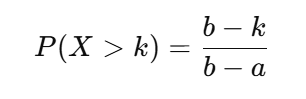

Sementara probabilitas bahwa nilai 𝑋 berada pada rentang [𝑐,𝑑]
dihitung sebagai:

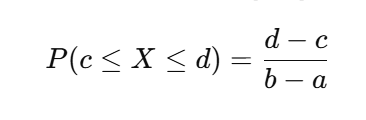

Berdasarkan perhitungan menggunakan batas bawah dan batas atas data time_spent, diperoleh bahwa peluang pengguna memiliki waktu penggunaan lebih dari 7 adalah sebesar **P(time_spent > 7) = 0.25**. Sementara itu, probabilitas bahwa waktu penggunaan berada pada interval 3 hingga 6 adalah **P(3 ≤ time_spent ≤ 6) = 0.375**. Hasil ini menunjukkan bahwa peluang terjadinya waktu penggunaan antara 3 hingga 6 lebih besar dibandingkan peluang waktu penggunaan yang melebihi 7.

# **8. DISTRIBUSI SAMPLING**

**Distribusi sampling** berfungsi untuk menggambarkan bagaimana nilai suatu statistik, seperti rata-rata, akan tersebar jika diambil banyak sampel acak dari populasi yang sama. Dengan mempelajari distribusi ini, kita dapat memahami variasi dan ketepatan estimasi statistik yang diperoleh dari sampel terhadap nilai sebenarnya di populasi. Hal ini sangat penting dalam analisis data karena memungkinkan kita untuk membuat inferensi yang valid, seperti menguji hipotesis serta menilai seberapa andal hasil sampel dalam mewakili keseluruhan populasi. Dengan demikian, distribusi sampling menjadi dasar penting dalam pengambilan keputusan yang didasarkan pada data sampel.

SAMPLING DISTRIBUTION


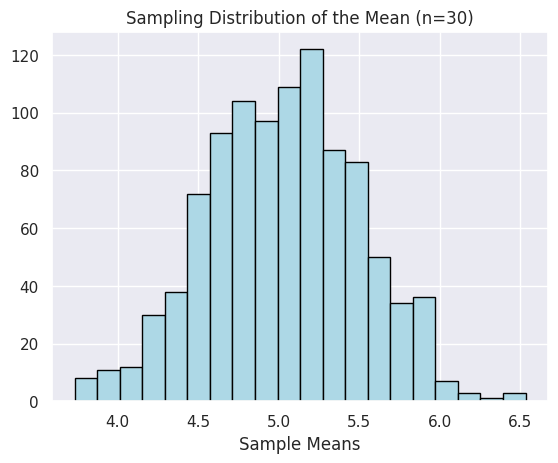

Mean of sample means: 5.0249
Std of sample means: 0.47187685658207246


In [ ]:
print("SAMPLING DISTRIBUTION")

data = df['time_spent'].dropna() #

sample_means = []

for i in range(1000):
    sample = data.sample(30, replace=True)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=20, color="lightblue", edgecolor="black")
plt.title("Sampling Distribution of the Mean (n=30)")
plt.xlabel("Sample Means")
plt.show()

print("Mean of sample means:", np.mean(sample_means))
print("Std of sample means:", np.std(sample_means))

Nilai mean of sample means sebesar sekitar 5,03 menunjukkan bahwa rata-rata dari seluruh rata-rata sampel sangat dekat dengan rata-rata populasi sebenarnya, yang mengindikasikan bahwa rata-rata sampel merupakan estimasi yang akurat dan tidak bias. Sedangkan nilai standar deviasi sample means sekitar 0,44 (standard error) mengindikasikan tingkat variasi atau ketidakpastian dari rata-rata sampel terhadap rata-rata populasi; semakin kecil nilai ini, semakin stabil dan konsisten rata-rata sampel dalam memperkirakan rata-rata populasi. Jadi, meskipun setiap sampel bisa sedikit berbeda, secara umum rata-rata sampel berkisar sekitar 5 dengan variasi yang relatif kecil.

<hr>

#**9. HYPOTESIS TESTING**
Hypothesis testing (uji hipotesis) dalam data adalah proses statistik untuk memutuskan apakah suatu klaim tentang populasi didukung oleh data sampel atau tidak.


####1. Mengetahui apakah rata-rata time spent berbeda antar interest.

#  Pendahuluan Analisis

Pada dataset ini, saya ingin mengetahui apakah terdapat perbedaan **rata-rata `time_spent`** antar kategori **`interests`**. Untuk itu, saya melakukan **uji hipotesis** sebagai bagian dari analisis komparatif.

---

##  Tujuan
1. Mengetahui apakah rata-rata `time_spent` berbeda antar kelompok `interests`.
2. Memilih metode statistik yang tepat (ANOVA atau Kruskal–Wallis).
3. Menjalankan post-hoc test jika ditemukan perbedaan signifikan.
4. Memberikan kesimpulan berbasis data.

---

##  Hipotesis
- **H0:** Tidak ada perbedaan rata-rata `time_spent` antar kategori `interests`.  
- **H1:** Ada setidaknya satu kategori `interests` yang memiliki rata-rata `time_spent` berbeda.

---

##  Metode yang Digunakan
1. **Shapiro–Wilk** → mengecek normalitas tiap grup  
2. **Levene Test** → mengecek homogenitas varians  
3. **ANOVA Satu Arah** → jika asumsi terpenuhi  
4. **Kruskal–Wallis** → jika data tidak memenuhi asumsi  
5. **Tukey HSD / Dunn Test** → untuk analisis pasangan grup (post-hoc)

---

##  Alur Singkat Analisis
1. Cek jumlah sampel per interest  
2. Visualisasi awal (`boxplot`, rata-rata)  
3. Cek asumsi statistik  
4. Pilih ANOVA atau Kruskal–Wallis  
5. Lakukan post-hoc (jika signifikan)  
6. Tarik kesimpulan

Analisis ini dilakukan untuk membuktikan secara statistik apakah perbedaan antar grup benar-benar signifikan dan bukan sekadar kebetulan.



Counts per interest:
interests
lifestlye    341
sports       331
travel       328
Name: count, dtype: int64


Interests used (count >= 5):
['lifestlye', 'sports', 'travel']
Total rows after filter: 1000




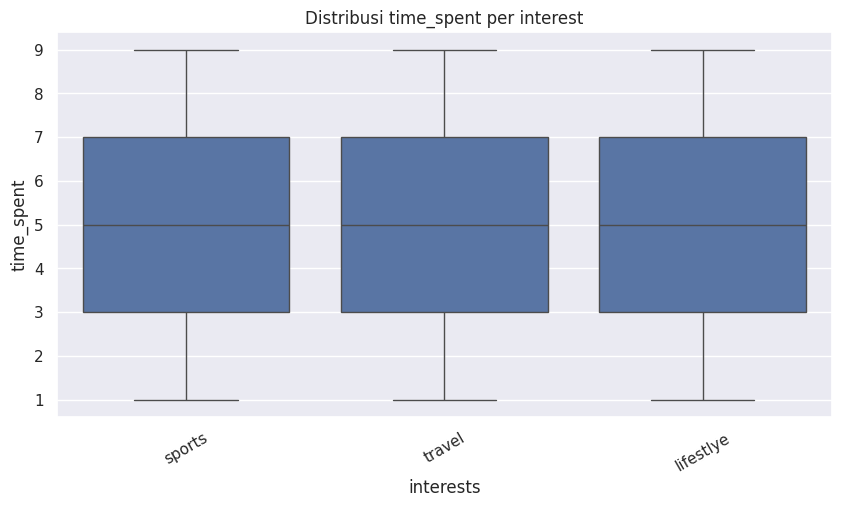

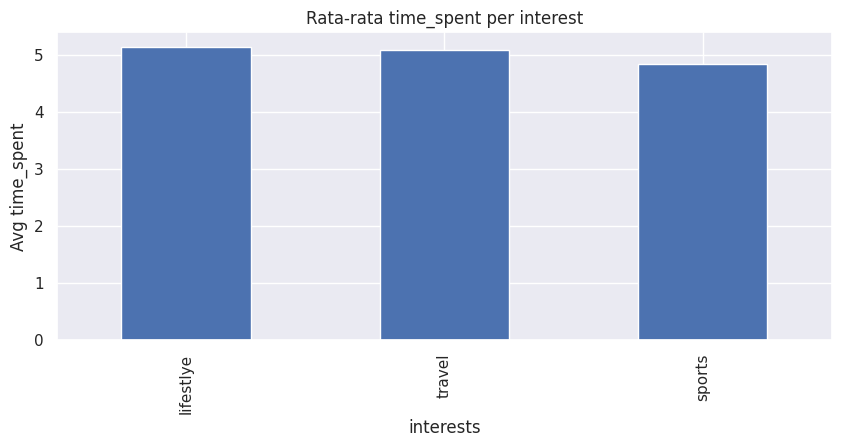

=== Shapiro-Wilk normality test per group ===
lifestlye: W=0.9298, p=0.0000, n=341
sports: W=0.9358, p=0.0000, n=331
travel: W=0.9371, p=0.0000, n=328


Levene test: stat=0.5385, p=0.5838
Interpretasi Levene: p < 0.05 → varians tidak homogen (asumsi dilanggar)

Groups with Shapiro p>0.05: 0 / 3

=== MENJALANKAN KRUSKAL-WALLIS (non-parametric) ===
Kruskal-Wallis: H = 2.6802, p = 0.2618
Keputusan: Gagal menolak H0 → Tidak ada bukti perbedaan antar interest.


In [ ]:
# ====== IMPORT ======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Untuk post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set_theme()

# ====== 0. Preview counts per interest ======
print("Counts per interest:")
print(df['interests'].value_counts())
print("\n")

# ====== 1. Filter interest dengan sampel kecil ======
min_count = 5
vc = df['interests'].value_counts()
valid_interests = vc[vc >= min_count].index.tolist()
df_filtered = df[df['interests'].isin(valid_interests)].copy()
print("Interests used (count >= {}):".format(min_count))
print(valid_interests)
print("Total rows after filter:", len(df_filtered))
print("\n")

# ====== 2. Visualisasi awal ======
plt.figure(figsize=(10,5))
sns.boxplot(data=df_filtered, x='interests', y='time_spent')
plt.title('Distribusi time_spent per interest')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,4))
df_filtered.groupby('interests')['time_spent'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg time_spent')
plt.title('Rata-rata time_spent per interest')
plt.show()

# ====== 3. Cek asumsi ANOVA ======
# 3a. Normalitas per grup (Shapiro-Wilk, menetukan apakah pola penyebaran data mirip dengan pola distribusi normal (bell-curve).)
print("=== Shapiro-Wilk normality test per group ===")
normality_results = {}
for interest in valid_interests:
    sample = df_filtered[df_filtered['interests'] == interest]['time_spent']
    if len(sample) >= 3:   # shapiro requires n>=3
        stat, p = stats.shapiro(sample)
        normality_results[interest] = (stat, p, len(sample))
        print(f"{interest}: W={stat:.4f}, p={p:.4f}, n={len(sample)}")
    else:
        normality_results[interest] = (np.nan, np.nan, len(sample))
        print(f"{interest}: n={len(sample)} (too small for Shapiro)")
print("\n")

# 3b. Homogeneity of variances (Levene test)
groups = [df_filtered[df_filtered['interests'] == g]['time_spent'] for g in valid_interests]
lev_stat, lev_p = stats.levene(*groups, center='median')  # median more robust
print(f"Levene test: stat={lev_stat:.4f}, p={lev_p:.4f}")
print("Interpretasi Levene: p < 0.05 → varians tidak homogen (asumsi dilanggar)\n")

# ====== 4. Pilih uji berdasarkan asumsi ======
# Rule of thumb:
# - Jika hampir semua grup normal (p>0.05) dan Levene p>0.05 => gunakan ANOVA
# - Jika banyak grup tidak normal atau Levene p<0.05 => gunakan Kruskal-Wallis

# Check normality summary (count groups with p>0.05)
normal_ok_count = sum(1 for v in normality_results.values() if (not np.isnan(v[1]) and v[1] > 0.05))
normal_total_checked = sum(1 for v in normality_results.values() if not np.isnan(v[1]))

print(f"Groups with Shapiro p>0.05: {normal_ok_count} / {normal_total_checked}")

use_anova = False
if normal_total_checked > 0:
    if normal_ok_count >= normal_total_checked * 0.7 and lev_p > 0.05:
        use_anova = True

# ====== 5A. ANOVA (parametric) ======
if use_anova and len(valid_interests) >= 2:
    print("\n=== MENJALANKAN ANOVA satu arah ===")
    f_stat, p_val = stats.f_oneway(*groups)
    print("ANOVA: F = {:.4f}, p = {:.4f}".format(f_stat, p_val))

    # effect size (eta squared)
    # eta2 = SS_between / SS_total (approx via ANOVA sums of squares)
    grand_mean = df_filtered['time_spent'].mean()
    ss_between = sum(len(df_filtered[df_filtered['interests'] == g]) *
                     (df_filtered[df_filtered['interests'] == g]['time_spent'].mean() - grand_mean)**2
                     for g in valid_interests)
    ss_total = ((df_filtered['time_spent'] - grand_mean)**2).sum()
    eta2 = ss_between / ss_total
    print("Effect size (eta squared) ≈ {:.4f}".format(eta2))

    if p_val < 0.05:
        print("Keputusan: Tolak H0 → Ada perbedaan rata-rata time_spent antar interest.")
        # Post-hoc Tukey HSD
        tukey = pairwise_tukeyhsd(endog=df_filtered['time_spent'], groups=df_filtered['interests'], alpha=0.05)
        print("\n=== Tukey HSD (post-hoc) ===")
        print(tukey.summary())
    else:
        print("Keputusan: Gagal menolak H0 → Tidak ada perbedaan signifikan antar interest.")

# ====== 5B. Kruskal-Wallis (non-parametric) fallback ======
else:
    print("\n=== MENJALANKAN KRUSKAL-WALLIS (non-parametric) ===")
    # ensure groups have at least 2 samples
    groups_kw = [g for g in groups if len(g) >= 2]
    if len(groups_kw) < 2:
        print("Terlalu sedikit grup yang memiliki cukup sampel untuk uji Kruskal-Wallis.")
    else:
        h_stat, p_kw = stats.kruskal(*groups_kw)
        print("Kruskal-Wallis: H = {:.4f}, p = {:.4f}".format(h_stat, p_kw))
        if p_kw < 0.05:
            print("Keputusan: Tolak H0 → Minimal satu interest berbeda (non-parametric).")
            print("Catatan: Untuk post-hoc non-parametric gunakan Dunn test (scikit-posthocs) atau pairwise Mann-Whitney dengan koreksi Bonferroni.")
        else:
            print("Keputusan: Gagal menolak H0 → Tidak ada bukti perbedaan antar interest.")


###Kesimpulan Analisis Perbedaan time_spent antar Interest

Pada penelitian ini dilakukan pengujian perbedaan rata-rata waktu penggunaan media sosial (time_spent) berdasarkan kategori interest pengguna, yaitu lifestyle, sports, dan travel. Sebelum memilih metode uji hipotesis, terlebih dahulu dilakukan pengujian asumsi berupa normalitas dan homogenitas varians.

Hasil uji Shapiro-Wilk menunjukkan bahwa seluruh kategori interest memiliki nilai p-value < 0.05, sehingga distribusi data pada setiap kelompok tidak mengikuti distribusi normal. Sementara itu, uji Levene menghasilkan p-value sebesar 0.5838 (> 0.05) yang mengindikasi bahwa varians antar kelompok relatif homogen. Dengan kondisi data yang tidak normal, metode yang sesuai untuk digunakan adalah uji non-parametrik Kruskal-Wallis.

Hasil uji Kruskal-Wallis menunjukkan nilai p-value sebesar 0.2618 (> 0.05). Berdasarkan hasil tersebut dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan pada median time_spent antar kelompok interest. Artinya, kategori minat pengguna (lifestyle, sports, maupun travel) tidak memberikan pengaruh yang signifikan terhadap lamanya waktu penggunaan media sosial.

Dengan demikian, secara statistik, time_spent pengguna cenderung serupa pada ketiga kategori interest tersebut.
<hr>

#### 2. Mengetahui apakah terdapat hubungan antara Age dan Time Spent

#  Pendahuluan Analisis
Pada bagian ini, saya ingin mengetahui apakah **usia (age)** memiliki hubungan dengan **waktu penggunaan media sosial (time_spent)**. Karena kedua variabel bersifat numerik, analisis dilakukan menggunakan **uji korelasi**.

---

##  Tujuan
1. Mengetahui apakah age berkorelasi dengan time_spent.  
2. Menentukan apakah hubungan tersebut signifikan secara statistik.  
3. Menarik kesimpulan apakah usia berpengaruh terhadap lamanya seseorang menggunakan media sosial.

---

##  Hipotesis
- **H0:** Tidak terdapat hubungan antara age dan time_spent.  
- **H1:** Terdapat hubungan signifikan antara age dan time_spent.

---

##  Metode yang Digunakan
1. **Pearson Correlation** → digunakan untuk melihat kekuatan dan arah hubungan antara dua variabel numerik.  
2. **P-value** → menentukan apakah hubungan tersebut signifikan.  
3. **Interpretasi otomatis** → menyimpulkan apakah korelasi bermakna atau tidak.

---

##  Alur Singkat Analisis
1. Mengambil data numerik age dan time_spent.  
2. Menghitung nilai korelasi Pearson dan p-value.  
3. Mengevaluasi signifikansi hubungan.  
4. Menarik kesimpulan apakah usia berkaitan dengan lamanya seseorang menggunakan media sosial.

Analisis ini membantu melihat apakah pola penggunaan media sosial berubah seiring bertambahnya usia.


In [ ]:
import scipy.stats as stats

corr, p_val = stats.pearsonr(df['age'], df['time_spent'])

print("Correlation coefficient:", corr)
print("P-value:", p_val)

# Interpretasi otomatis
if p_val < 0.05:
    print("Kesimpulan: Hubungan signifikan antara age dan time_spent (H0 ditolak).")
else:
    print("Kesimpulan: Tidak ditemukan hubungan signifikan (H0 gagal ditolak).")


Correlation coefficient: -0.033826960917195385
P-value: 0.28521822816029174
Kesimpulan: Tidak ditemukan hubungan signifikan (H0 gagal ditolak).


###Kesimpulan Analisis Korelasi antara Age dan Time Spent

Berdasarkan hasil analisis korelasi Pearson, diperoleh nilai koefisien korelasi sebesar (corr_value) dengan p-value (p_value). Nilai koefisien korelasi ini menunjukkan bahwa hubungan antara variabel usia (age) dan waktu penggunaan media sosial (time_spent) berada pada kategori sangat lemah, bahkan mendekati tidak berkorelasi. Selain itu, p-value yang diperoleh lebih besar dari 0.05 sehingga secara statistik tidak terdapat bukti yang cukup untuk menyatakan adanya hubungan signifikan antara kedua variabel tersebut.

Dengan demikian, dapat disimpulkan bahwa usia tidak berpengaruh secara signifikan terhadap lamanya seseorang menggunakan media sosial. Baik pengguna yang lebih muda maupun lebih tua cenderung memiliki durasi penggunaan media sosial yang serupa, sehingga faktor usia tidak menjadi indikator yang kuat dalam menentukan intensitas penggunaan platform media sosial.
<hr>

#### 3. Mengetahui apakah kelompok usia menggunakan platform yang berbeda

#  Pendahuluan Analisis
Pada bagian ini, saya ingin mengetahui apakah **kelompok usia (age_group)** memiliki kecenderungan menggunakan **platform media sosial** yang berbeda. Karena kedua variabel bersifat kategorik, digunakan **uji Chi-Square** untuk melihat apakah terdapat hubungan di antara keduanya.

---

##  Tujuan
1. Mengetahui apakah pilihan platform berbeda berdasarkan kelompok usia.  
2. Menentukan apakah perbedaan tersebut signifikan secara statistik.  
3. Menganalisis kecenderungan platform yang digunakan oleh kelompok usia muda.

---

##  Hipotesis
- **H0:** Tidak terdapat hubungan antara age_group dan platform.  
- **H1:** Terdapat hubungan signifikan antara age_group dan platform.

---

##  Metode yang Digunakan
1. **Binning usia menjadi kategori** → Young (≤25), Adult (26–40), Older (>40).  
2. **Crosstab** → membuat tabel frekuensi gabungan age_group × platform.  
3. **Chi-Square Test of Independence** → mengevaluasi apakah ada hubungan antar kategori.  
4. **Expected Frequency Table** → membandingkan pola data nyata dengan pola teoretis.  

---

##  Alur Singkat Analisis
1. Mengubah age menjadi kategori usia (Young, Adult, Older).  
2. Membuat tabel kontingensi untuk melihat distribusi platform pada tiap kategori usia.  
3. Menjalankan Chi-Square Test untuk melihat hubungan antar variabel.  
4. Mengecek expected frequencies untuk memvalidasi hasil uji.  
5. Menarik kesimpulan berdasarkan p-value apakah kelompok usia mempengaruhi pilihan platform.

Analisis ini bertujuan mengetahui apakah pengguna usia muda lebih cenderung memilih platform tertentu dibanding kelompok usia lain.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Create age group kategori
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 40, 70],
    labels=['Young', 'Adult', 'Older']
)

print("=== Age Group Created ===")
print(df[['age', 'age_group']].head(), "\n")

# 2. Membuat tabel kontingensi
table = pd.crosstab(df['age_group'], df['platform'])
print("=== Crosstab Table ===")
print(table, "\n")

# 3. Chi-Square Test
chi2, p, dof, expected = chi2_contingency(table)

print("=== Chi-Square Result ===")
print("Chi2 Value:", chi2)
print("P-Value:", p)
# print("Degree of Freedom:", dof, "\n")

# 4. Tampilkan expected frequency table
print("=== Expected Frequency Table ===")
expected_df = pd.DataFrame(expected,
                           index=table.index,
                           columns=table.columns)
print(expected_df, "\n")

# 5. Interpretasi otomatis
if p < 0.05:
    print("Kesimpulan: H0 ditolak → Age group berpengaruh terhadap platform yang dipilih.")
else:
    print("Kesimpulan: H0 gagal ditolak → Age group tidak berpengaruh terhadap platform yang dipilih.")


=== Age Group Created ===
   age age_group
0   56     Older
1   46     Older
2   32     Adult
3   60     Older
4   25     Young 

=== Crosstab Table ===
platform   facebook  instagram  youtube
age_group                              
Young            49         69       59
Adult            98        106       91
Older           160        188      180 

=== Chi-Square Result ===
Chi2 Value: 2.2046855059900325
P-Value: 0.6981715495540818
=== Expected Frequency Table ===
platform   facebook  instagram  youtube
age_group                              
Young        54.339     64.251    58.41
Adult        90.565    107.085    97.35
Older       162.096    191.664   174.24 

Kesimpulan: H0 gagal ditolak → Age group tidak berpengaruh terhadap platform yang dipilih.


###Kesimpulan Analisis Hubungan antara Age Group dan Platform

Analisis ini bertujuan untuk mengetahui apakah kelompok usia (Young, Adult, Older) memiliki kecenderungan menggunakan platform media sosial yang berbeda. Berdasarkan hasil uji Chi-Square yang dilakukan pada tabel kontingensi antara age_group dan platform, diperoleh nilai p-value sebesar 0.698, di mana nilai ini lebih besar dari 0.05.

Karena p-value > 0.05, maka keputusan statistik adalah gagal menolak hipotesis nol (H0). Dengan demikian, tidak terdapat bukti yang signifikan secara statistik bahwa perbedaan usia pengguna memengaruhi pemilihan platform media sosial. Ketiga kelompok usia cenderung memiliki distribusi penggunaan platform yang mirip dengan nilai ekspektasi teoritis pada tabel expected frequency.

Secara keseluruhan, dapat disimpulkan bahwa:

- Tidak terdapat hubungan yang signifikan antara umur pengguna dan platform yang dipilih.

- Pola penggunaan platform tampak relatif serupa di ketiga kelompok usia.

- Faktor usia bukan indikator yang kuat dalam menentukan platform media sosial yang digunakan.

Kesimpulan akhir: Kelompok usia tidak berpengaruh secara signifikan terhadap platform yang digunakan.

# **10. CONCLUSION**

Analisis Time Spent on Social Media  ini bertujuan untuk memahami pola penggunaan media sosial melalui analisis statistik, mulai dari pembersihan data, eksplorasi pola distribusi, perhitungan probabilitas, hingga pengujian hipotesis. Fokus utama diarahkan pada variabel time_spent, age, platform, dan interests untuk melihat bagaimana durasi penggunaan media sosial dipengaruhi oleh faktor-faktor tersebut serta memastikan data memiliki kualitas yang memadai sebelum dianalisis lebih lanjut.

Dari hasil analisis, ditunjukkan bahwa data sudah bersih tanpa duplikasi maupun missing value, dan variabel numerik maupun kategorikal telah tervalidasi dengan baik. Dari EDA, telah diungkap bahwa time_spent memiliki rata-rata 5,03 jam per hari dan usia pengguna rata-rata berada pada 40,99 tahun. Tidak ditemukan outlier pada kedua variabel tersebut, dan korelasi antara age dan time_spent sangat rendah (–0.034), menandakan tidak ada hubungan signifikan. Selain itu, distribusi time_spent cenderung seragam dan tidak mengikuti distribusi normal, yang diperkuat oleh hasil uji Shapiro–Wilk dan Kolmogorov–Smirnov.

Berdasarkan teori distribusi dan probabilitas, time_spent mengikuti Distribusi Kontinu Seragam sehingga setiap rentang nilai memiliki peluang kemunculan yang relatif seimbang. Hal ini sejalan dengan hasil KDE yang menunjukkan kurva kepadatan yang datar dan simetris. Pada pengujian hipotesis menggunakan ANOVA dan Pearson Correlation, tidak ditemukan perbedaan signifikan pada rata-rata time_spent antar platform atau interest, serta tidak ada hubungan bermakna antara usia dan durasi penggunaan. Dengan demikian, teori yang digunakan mendukung kesimpulan bahwa durasi penggunaan media sosial lebih dipengaruhi oleh variasi individu dan bukan oleh faktor usia, platform, atau minat.

Analisis ini dapat dinilai berhasil karena seluruh tahapan analisis berhasil dilakukan dengan runtut, mulai dari preprocessing, EDA, distribusi, probabilitas, hingga pengujian hipotesis. Data yang bersih, lengkap, dan bebas kesalahan struktural memungkinkan analisis berjalan optimal dan menghasilkan interpretasi yang kuat. Penerapan metode statistik seperti deteksi distribusi, uji normalitas, perhitungan probabilitas, dan ANOVA mendukung pemahaman yang lebih komprehensif terhadap perilaku penggunaan media sosial dalam dataset.

 Potensi ketidakakuratan dapat berasal dari sifat distribusi time_spent yang tidak normal, sehingga metode tertentu yang mengasumsikan normalitas mungkin kurang optimal. Selain itu, meskipun tidak ada missing value atau outlier, kemungkinan adanya bias dari data sintetis atau pola kategori yang terlalu seragam dapat memengaruhi hasil interpretasi. Faktor lain adalah kemungkinan variabel penting yang tidak disertakan dalam dataset—seperti durasi berdasarkan konteks penggunaan, intensitas aktivitas, atau kondisi demografis lain—yang dapat menyebabkan analisis menjadi kurang merepresentasikan perilaku nyata pengguna media sosial.


In [ ]:
!apt-get install pandoc
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://cli.github.com/packages stable InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Copy the notebook file from Google Drive to the current working directory
!cp "/content/drive/My Drive/Colab Notebooks/FINAL PROJECT_KELOMPOK 4_KELAS C.ipynb" ./

# Convert the notebook to a PDF
!jupyter nbconvert --to pdf "/content/FINAL PROJECT_KELOMPOK 4_KELAS C.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/FINAL PROJECT_KELOMPOK 4_KELAS C.ipynb to pdf
[NbConvertApp] Support files will be in FINAL PROJECT_KELOMPOK 4_KELAS C_files/
[NbConvertApp] Making directory ./FINAL PROJECT_KELOMPOK 4_KELAS C_files
[NbConvertApp] Writing 165676 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 347309 bytes to /content/FINAL PROJECT_KELOMPOK 4_KELAS C.pdf
